# No SQL

## Objetivo:
 Encontrar segmentos de poblacion con poca representacion en Nobel
## Req
- Listado de Mujerers ganadoras del Nobel
  - Que % de total de premiados... (Python o mongo)
- Listado de 10 paises con menos premios Nobel
  - Que % representan del total de paises premiados...
- Listado de Categorias con menor representacion de mujeres
- Listado de paises con menor representacion de mujeres
- Listado de anios donde el numero de paises representados es menor al promedio historico

### Steps:
1. Instalar MongoDB
2. Importar archivos
3. Generar las consultas, agg y Proyecciones necesarias
4. A partir del paso ant generear las operaciones necesarias para los %
5. Almacenar el resultado en un variable que tenga el nombre del dato
6. Justifica tus decisiones e interpreta los resultados

In [1]:
#!apt install mongodb >log
#!service mongodb start

In [2]:
#!sudo apt update
#!sudo apt install mongodb
#!sudo apt install mongodb-org

In [3]:
#!sudo wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb

In [4]:
#!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

In [5]:
#!sudo apt-get update
#!sudo apt-get install -y mongodb-org

In [6]:
#!sudo rm libssl1.1_1.1.1f-1ubuntu2_amd64.deb

In [7]:
""" From web but also failed
# MongoDB download and installation
!wget https://fastdl.mongodb.org/linux/mongodb-linux-x86_64-debian71-3.0.15.tgz  # Downloads MongoDB from official repository
!tar xfv mongodb-linux-x86_64-debian71-3.0.15.tgz     # Unpack compressed file
!rm mongodb-linux-x86_64-debian71-3.0.15.tgz          # Removes downloaded file

# Default location of database is "/data/db" folder
!mkdir /data                                          # data folder creation
!mkdir /data/db                                       # db folder creation inside data
"""

' From web but also failed\n# MongoDB download and installation\n!wget https://fastdl.mongodb.org/linux/mongodb-linux-x86_64-debian71-3.0.15.tgz  # Downloads MongoDB from official repository\n!tar xfv mongodb-linux-x86_64-debian71-3.0.15.tgz     # Unpack compressed file\n!rm mongodb-linux-x86_64-debian71-3.0.15.tgz          # Removes downloaded file\n\n# Default location of database is "/data/db" folder\n!mkdir /data                                          # data folder creation\n!mkdir /data/db                                       # db folder creation inside data\n'

In [8]:
#despues de preguntarle al super team de TLG:

!apt update
!apt install wget curl gnupg2 software-properties-common apt-transport-https ca-certificates lsb-release
!curl -fsSL https://www.mongodb.org/static/pgp/server-6.0.asc|sudo gpg --dearmor -o /etc/apt/trusted.gpg.d/mongodb-6.gpg
!echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu $(lsb_release -cs)/mongodb-org/6.0 multiverse" | tee /etc/apt/sources.list.d/mongodb-org-6.0.list
!apt update
!apt install mongodb-org
!mkdir /data
!mkdir /data/db
!mongod --fork --logpath /var/log/mongodb/mongod.log

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 InRelease
Hit:8 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 Release
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 2s (143 kB/s)
Reading package lists... Done
Building dependency tree... Done
Read

In [9]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
!mongod

{"t":{"$date":"2024-05-18T18:29:26.805+00:00"},"s":"I",  "c":"CONTROL",  "id":23285,   "ctx":"-","msg":"Automatically disabling TLS 1.0, to force-enable TLS 1.0 specify --sslDisabledProtocols 'none'"}
{"t":{"$date":"2024-05-18T18:29:26.806+00:00"},"s":"I",  "c":"NETWORK",  "id":4915701, "ctx":"main","msg":"Initialized wire specification","attr":{"spec":{"incomingExternalClient":{"minWireVersion":0,"maxWireVersion":17},"incomingInternalClient":{"minWireVersion":0,"maxWireVersion":17},"outgoing":{"minWireVersion":6,"maxWireVersion":17},"isInternalClient":true}}}
{"t":{"$date":"2024-05-18T18:29:26.806+00:00"},"s":"I",  "c":"NETWORK",  "id":4648601, "ctx":"main","msg":"Implicit TCP FastOpen unavailable. If TCP FastOpen is required, set tcpFastOpenServer, tcpFastOpenClient, and tcpFastOpenQueueSize."}
{"t":{"$date":"2024-05-18T18:29:26.808+00:00"},"s":"I",  "c":"REPL",     "id":5123008, "ctx":"main","msg":"Successfully registered PrimaryOnlyService","attr":{"service":"TenantMigrationDonorSe

In [11]:
cd gdrive/

/content/gdrive


In [12]:
# importar
!mongoimport --host 127.0.0.1 --db nobel --collection laurates --type=json --file=MyDrive/NoSQL/json_laureates.json --jsonArray
!mongoimport --host 127.0.0.1 --db nobel --collection awards --type json --file MyDrive/NoSQL/json_award.json --jsonArray


2024-05-18T18:29:26.950+0000	connected to: mongodb://127.0.0.1/
2024-05-18T18:29:27.474+0000	943 document(s) imported successfully. 0 document(s) failed to import.
2024-05-18T18:29:27.535+0000	connected to: mongodb://127.0.0.1/
2024-05-18T18:29:27.696+0000	646 document(s) imported successfully. 0 document(s) failed to import.


In [13]:
!pip install pymongo

from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [14]:
nobel = client['nobel']
#referenciando

In [15]:
lau = nobel.laurates
awa = nobel.awards

In [16]:
#EDA... laurates
_query1 = list(lau.find({}))
_query1[800]


{'_id': ObjectId('6648e86806e1424a4696daa0'),
 'id': '680',
 'knownName': {'en': 'Simon Kuznets', 'se': 'Simon Kuznets'},
 'givenName': {'en': 'Simon', 'se': 'Simon'},
 'familyName': {'en': 'Kuznets', 'se': 'Kuznets'},
 'fullName': {'en': 'Simon Kuznets', 'se': 'Simon Kuznets'},
 'gender': 'male',
 'birth': {'date': '1901-04-30',
  'place': {'city': {'en': 'Pinsk', 'no': 'Pinsk', 'se': 'Pinsk'},
   'country': {'en': 'Russian Empire',
    'no': 'Det russiske imperiet',
    'se': 'Kejsardömet Ryssland'},
   'cityNow': {'en': 'Pinsk', 'no': 'Pinsk', 'se': 'Pinsk'},
   'countryNow': {'en': 'Belarus', 'no': 'Hviterussland', 'se': 'Vitryssland'},
   'continent': {'en': 'Europe'},
   'locationString': {'en': 'Pinsk, Russian Empire (now Belarus)',
    'no': 'Pinsk, Det russiske imperiet (nå Hviterussland)',
    'se': 'Pinsk, Kejsardömet Ryssland (nu Vitryssland)'}}},
 'death': {'date': '1985-07-08',
  'place': {'city': {'en': 'Cambridge, MA',
    'no': 'Cambridge, MA',
    'se': 'Cambridge, MA

In [17]:
#EDA... awards
_query1 = list(awa.find({}))
_query1[169]

{'_id': ObjectId('6648e8697a6464ba6496c82e'),
 'awardYear': '1935',
 'category': {'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'},
 'categoryFullName': {'en': 'The Nobel Prize in Chemistry',
  'no': 'Nobelprisen i kjemi',
  'se': 'Nobelpriset i kemi'},
 'prizeAmount': 159917,
 'prizeAmountAdjusted': 4997406,
 'links': {'rel': 'nobelPrize',
  'href': 'http://masterdataapi.nobelprize.org/2/nobelPrize/che/1935',
  'action': 'Get',
  'types': 'application/json'},
 'laureates': [{'id': '193',
   'knownName': {'en': 'Frédéric Joliot'},
   'portion': '1/2',
   'sortOrder': '1',
   'motivation': {'en': 'in recognition of their synthesis of new radioactive elements',
    'se': 'såsom ett erkännande för deras gemensamt utförda syntes av nya radioaktiva grundämnen'},
   'links': {'rel': 'laureate',
    'href': 'http://masterdataapi.nobelprize.org/2/laureate/193',
    'action': 'Get',
    'types': 'application/json'}},
  {'id': '194',
   'knownName': {'en': 'Irène Joliot-Curie'},
   'portion': '1/

In [18]:
pipeline2 = [
    {"$group": {"_id": "$gender", "count": {"$sum": 1}}}
]

result2 = list(lau.aggregate(pipeline2))

for doc in result2:
    print(doc['_id'], doc['count'])

female 106
male 1732
None 48


In [19]:
# get all the femmes que han ganado en lista

query1 = {'gender':'female'}
q1 = list(lau.find(query1))
len(q1)

106

In [20]:
#just checking the non binaries...

query1b = {'gender':None}
q1b = list(lau.find(query1b))
q1b[-3]

{'_id': ObjectId('6648f387596428ca293d18fb'),
 'id': '748',
 'orgName': {'en': 'United Nations',
  'no': 'De Forente Nasjoner (FN)',
  'se': 'Förenta Nationerna (FN)'},
 'nativeName': 'United Nations (U.N.)',
 'acronym': 'U.N.',
 'founded': {'date': '1945-00-00',
  'place': {'city': {'en': 'New York, NY',
    'no': 'New York, NY',
    'se': 'New York, NY'},
   'country': {'en': 'USA', 'no': 'USA', 'se': 'USA'},
   'cityNow': {'en': 'New York, NY',
    'no': 'New York, NY',
    'se': 'New York, NY'},
   'countryNow': {'en': 'USA', 'no': 'USA', 'se': 'USA'},
   'continent': {'en': 'North America'},
   'locationString': {'en': 'New York, NY, USA',
    'no': 'New York, NY, USA',
    'se': 'New York, NY, USA'}}},
 'links': {'rel': 'laureate',
  'href': 'http://masterdataapi.nobelprize.org/2/laureate/748',
  'action': 'Get',
  'types': 'application/json'},
 'nobelPrizes': [{'awardYear': '2001',
   'category': {'en': 'Peace', 'no': 'Fred', 'se': 'Fred'},
   'categoryFullName': {'en': 'The Nob

# 1er Pregunta,  Q % de Premiados son mujeres?

In [21]:
p1 = len(q1)/lau.count_documents({})*100

print(f'El porcentaje de mujeres que han ganado el nobel es {p1:.2f}%')

El porcentaje de mujeres que han ganado el nobel es 5.62%


# 2nda, Listado de paises con menos premios Nobel

In [22]:
pipeline = [
    {"$group": {"_id": "$birth.place.countryNow.en", "count": {"$sum": 1}}}
]

result = list(lau.aggregate(pipeline))

In [23]:
result

[{'_id': 'Zimbabwe', 'count': 2},
 {'_id': 'Latvia', 'count': 2},
 {'_id': 'Slovenia', 'count': 2},
 {'_id': 'South Korea', 'count': 4},
 {'_id': 'Guatemala', 'count': 4},
 {'_id': 'Azerbaijan', 'count': 2},
 {'_id': 'Indonesia', 'count': 2},
 {'_id': 'New Zealand', 'count': 6},
 {'_id': 'Japan', 'count': 54},
 {'_id': 'Trinidad and Tobago', 'count': 2},
 {'_id': 'Bosnia and Herzegovina', 'count': 4},
 {'_id': 'United Kingdom', 'count': 172},
 {'_id': 'Egypt', 'count': 12},
 {'_id': 'Czech Republic', 'count': 12},
 {'_id': 'China', 'count': 24},
 {'_id': 'Brazil', 'count': 2},
 {'_id': 'Yemen', 'count': 2},
 {'_id': 'Saint Lucia', 'count': 4},
 {'_id': 'Sweden', 'count': 58},
 {'_id': 'Italy', 'count': 38},
 {'_id': 'Scotland', 'count': 22},
 {'_id': 'Finland', 'count': 10},
 {'_id': 'Venezuela', 'count': 2},
 {'_id': 'Costa Rica', 'count': 2},
 {'_id': 'Slovakia', 'count': 2},
 {'_id': 'Morocco', 'count': 2},
 {'_id': 'Australia', 'count': 20},
 {'_id': 'Lithuania', 'count': 6},
 {'_i

In [24]:
import pandas as pd
countries = pd.DataFrame(result)

countries = countries.sort_values(by='count')

listado_bottom10 = countries.head(10)['_id'].unique()
countries.head(10)

,_id,count
0,Zimbabwe,2
25,Morocco,2
30,Cyprus,2
31,Croatia,2
32,Guadeloupe Island,2
35,Bulgaria,2
39,Iceland,2
40,Myanmar,2
81,Greece,2
42,Vietnam,2


<Axes: title={'center': 'yup its skewed'}, xlabel='_id'>

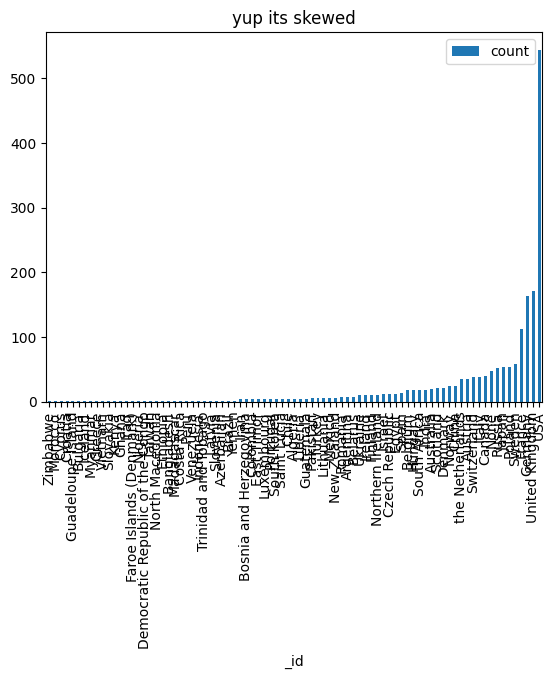

In [25]:
countries.plot(x='_id', y='count', kind='bar', title='yup its skewed')

In [26]:
listado_b10_2 = countries[countries['count']==countries['count'].min()]['_id'].unique()
listado_b10_2

array(['Zimbabwe', 'Morocco', 'Cyprus', 'Croatia', 'Guadeloupe Island',
       'Bulgaria', 'Iceland', 'Myanmar', 'Greece', 'Vietnam', 'Slovakia',
       'Kenya', 'Ghana', 'Iraq', 'Faroe Islands (Denmark)', 'Nigeria',
       'Democratic Republic of the Congo', 'Taiwan', 'North Macedonia',
       'Ethiopia', 'Bangladesh', 'Madagascar', 'Costa Rica', 'Peru',
       'Venezuela', 'Indonesia', 'Trinidad and Tobago', 'Latvia',
       'Slovenia', 'Azerbaijan', 'Brazil', 'Yemen'], dtype=object)

In [27]:
#pero piden bottom 10
listado_bottom10

array(['Zimbabwe', 'Morocco', 'Cyprus', 'Croatia', 'Guadeloupe Island',
       'Bulgaria', 'Iceland', 'Myanmar', 'Greece', 'Vietnam'],
      dtype=object)

In [28]:
p2 = len(listado_bottom10)/len(countries[countries['_id'].notnull()]['_id'].unique())*100

print(f'El % de paises que han ganado la minimima cantidad de nobels de los paises premiados es {p2:.2f}%')

El % de paises que han ganado la minimima cantidad de nobels de los paises premiados es 12.20%


# 3er Query, Listado de Categorias con menor representacion de mujeres

In [29]:
pipeline3 = [
    {"$match": {"gender": "female"}},
    {"$group": {"_id": "$nobelPrizes.category.en", "count": {"$sum": 1}}},
    {"$sort": {"count": 1}},
]

result3 = list(lau.aggregate(pipeline3))
"""
nobelPrizes': [{'awardYear': '1998',
   'category': {'en': 'Physics'
   """

for doc in result3:
    print(doc['_id'], doc['count'])

['Physics', 'Chemistry'] 2
['Physics'] 4
['Economic Sciences'] 4
['Chemistry'] 8
['Physiology or Medicine'] 24
['Literature'] 30
['Peace'] 34


In [30]:
pipeline3b = [
    {"$group": {"_id": "$nobelPrizes.category.en", "count": {"$sum": 1}}},
]

result3b = list(lau.aggregate(pipeline3b))
"""
nobelPrizes': [{'awardYear': '1998',
   'category': {'en': 'Physics'
   """

for doc in result3b:
    print(doc['_id'], doc['count'])

['Physiology or Medicine'] 438
['Physics'] 420
['Literature'] 232
['Physics', 'Chemistry'] 2
['Peace', 'Peace'] 2
['Economic Sciences'] 168
['Physics', 'Physics'] 2
['Chemistry', 'Chemistry'] 2
['Peace', 'Chemistry'] 2
['Peace', 'Peace', 'Peace'] 2
['Chemistry'] 360
['Peace'] 256


In [31]:
pipeline3c = [
    {"$match": {"nobelPrizes.category.en": {"$all": ["Peace", "Chemistry"]}}},
    {"$limit": 1}
]

result3c = list(lau.aggregate(pipeline3c))
result3c

[{'_id': ObjectId('6648e86806e1424a4696d9a0'),
  'id': '217',
  'knownName': {'en': 'Linus Pauling', 'se': 'Linus Pauling'},
  'givenName': {'en': 'Linus', 'se': 'Linus'},
  'familyName': {'en': 'Pauling', 'se': 'Pauling'},
  'fullName': {'en': 'Linus Carl Pauling', 'se': 'Linus Carl Pauling'},
  'gender': 'male',
  'birth': {'date': '1901-02-28',
   'place': {'city': {'en': 'Portland, OR',
     'no': 'Portland, OR',
     'se': 'Portland, OR'},
    'country': {'en': 'USA', 'no': 'USA', 'se': 'USA'},
    'cityNow': {'en': 'Portland, OR',
     'no': 'Portland, OR',
     'se': 'Portland, OR'},
    'countryNow': {'en': 'USA', 'no': 'USA', 'se': 'USA'},
    'continent': {'en': 'North America'},
    'locationString': {'en': 'Portland, OR, USA',
     'no': 'Portland, OR, USA',
     'se': 'Portland, OR, USA'}}},
  'death': {'date': '1994-08-19',
   'place': {'city': {'en': 'Big Sur, CA',
     'no': 'Big Sur, CA',
     'se': 'Big Sur, CA'},
    'country': {'en': 'USA', 'no': 'USA', 'se': 'USA'}

#### Damn, hasta hay quienes han ganado multiples veces

In [32]:
# a ver este?
pipeline3c = [
    {"$match": {"nobelPrizes.category.en": {"$all": ["Physics",  "Chemistry"]}}},
    {"$limit": 1}
]

result3c = list(lau.aggregate(pipeline3c))
result3c

#marie curie

[{'_id': ObjectId('6648e86806e1424a4696d9b6'),
  'id': '6',
  'knownName': {'en': 'Marie Curie', 'se': 'Marie Curie'},
  'givenName': {'en': 'Marie', 'se': 'Marie'},
  'familyName': {'en': 'Curie', 'se': 'Curie'},
  'fullName': {'en': 'Marie Curie, née Sklodowska',
   'se': 'Marie Curie, née Sklodowska'},
  'gender': 'female',
  'birth': {'date': '1867-11-07',
   'place': {'city': {'en': 'Warsaw', 'no': 'Warszawa', 'se': 'Warszawa '},
    'country': {'en': 'Russian Empire',
     'no': 'Det russiske imperiet',
     'se': 'Kejsardömet Ryssland'},
    'cityNow': {'en': 'Warsaw', 'no': 'Warszawa', 'se': 'Warszawa '},
    'countryNow': {'en': 'Poland', 'no': 'Polen', 'se': 'Polen'},
    'continent': {'en': 'Europe'},
    'locationString': {'en': 'Warsaw, Russian Empire (now Poland)',
     'no': 'Warszawa, Det russiske imperiet (nå Polen)',
     'se': 'Warszawa , Kejsardömet Ryssland (nu Polen)'}}},
  'death': {'date': '1934-07-04',
   'place': {'city': {'en': 'Sallanches',
     'no': 'Salla

In [33]:
#bueno como sea, quiero sacar las categorias totales y ya sacamos el listadoo
_pq3 = pd.DataFrame(result3)
_pq3b = pd.DataFrame(result3b)

_q3, _q3b = _pq3.explode('_id'), _pq3b.explode('_id')

rq3 = _q3.groupby('_id')['count'].sum().reset_index()
rq3b = _q3b.groupby('_id')['count'].sum().reset_index()

rq3.columns = ['Category', 'Female_Count']
rq3b.columns = ['Category', 'Total_Count']

res3 = rq3.merge(rq3b, how='outer', on='Category')
res3['Perc'] = res3['Female_Count']/res3['Total_Count']
res3 = res3.sort_values(by='Perc')
res3

,Category,Female_Count,Total_Count,Perc
4,Physics,6,426,0.014085
1,Economic Sciences,4,168,0.023810
0,Chemistry,10,368,0.027174
5,Physiology or Medicine,24,438,0.054795
3,Peace,34,268,0.126866
2,Literature,30,232,0.129310


In [34]:
p3 = res3[res3['Perc']<0.05]['Category'].unique()

print(f'El listado de Categorias con representacion <5%')
p3

El listado de Categorias con representacion <5%


array(['Physics', 'Economic Sciences', 'Chemistry'], dtype=object)

# 4to Query, Listado de Paises con menor representacion de mujeres

In [35]:
#hay hubiera hecho una funcion pero bueno, ya na mas falta otra....
pipeline4 = [
    {"$match": {"gender": "female"}},
    {"$group": {"_id": "$birth.place.countryNow.en", "count": {"$sum": 1}}},
    {"$sort": {"count": 1}},
]

result4 = list(lau.aggregate(pipeline4))
"""
nobelPrizes': [{'awardYear': '1998',
   'category': {'en': 'Physics'
   """
_p4 = pd.DataFrame(result4)
_p4.columns=['Country', 'Female_Count']

In [36]:
pipeline4b = [
    {"$group": {"_id": "$birth.place.countryNow.en", "count": {"$sum": 1}}},
]

result4b = list(lau.aggregate(pipeline4b))

_p4b = pd.DataFrame(result4b)
_p4b.columns=['Country', 'Total_Count']

In [37]:
p4 = _p4.merge(_p4b, how='outer', on='Country')
p4['Perc'] = p4['Female_Count']/p4['Total_Count']
p4['Perc'] = p4['Perc'].fillna(0)
p4 = p4.sort_values(by='Perc')
p4

,Country,Female_Count,Total_Count,Perc
41,Saint Lucia,NaN,4,0.0
59,Vietnam,NaN,2,0.0
58,India,NaN,18,0.0
57,Iceland,NaN,2,0.0
56,None,NaN,48,0.0
...,...,...,...,...
3,Kenya,2.0,2,1.0
2,Myanmar,2.0,2,1.0
25,Iran,4.0,4,1.0
7,North Macedonia,2.0,2,1.0


In [38]:
res4 = p4[p4['Perc']<0.05]['Country'].unique()

print(f'El listado de Categorias con representacion <5%')
res4

El listado de Categorias con representacion <5%


array(['Saint Lucia', 'Vietnam', 'India', 'Iceland', None, 'Belgium',
       'Bulgaria', 'Hungary', 'Guadeloupe Island', 'Croatia', 'Cyprus',
       'Algeria', 'Lithuania', 'Morocco', 'Slovakia', 'Costa Rica',
       'Venezuela', 'Finland', 'Argentina', 'Scotland', 'Russia', 'Ghana',
       'Mexico', 'Bangladesh', 'Spain', 'Ethiopia', 'Taiwan', 'Portugal',
       'East Timor', 'Switzerland', 'Colombia', 'Turkey',
       'Democratic Republic of the Congo', 'Nigeria', 'the Netherlands',
       'Ireland', 'Faroe Islands (Denmark)', 'Luxembourg', 'Belarus',
       'Madagascar', 'Greece', 'Peru', 'United Kingdom',
       'Bosnia and Herzegovina', 'Trinidad and Tobago', 'Japan',
       'New Zealand', 'Indonesia', 'Azerbaijan', 'South Korea',
       'Slovenia', 'Latvia', 'Zimbabwe', 'Brazil', 'Germany', 'USA'],
      dtype=object)

In [39]:
#Mex :(

# 5to query, Listado de anios donde el numero de paises representados es menor al AVG historico...

In [40]:
#revisando las lecciones de la clase encontre un ejemplo muy parecido:

  #pude haber usado el match exist antes pero bueno jaja
pipeline5b = [{
    '$match':
    {'nobelPrizes.affiliations.country.en':{
            '$exists':1}}},
    {
        '$group':
        {'_id':'$nobelPrizes.awardYear',
            'total_countries':
            {"$sum":{
                    '$size':'$nobelPrizes.affiliations.country.en'}}}},
    {
        "$sort":
        {
            'total_countries':1}}]

l_countries_perY = list(lau.aggregate(pipeline5b))
l_countries_perY

[{'_id': ['1917'], 'total_countries': 2},
 {'_id': ['1903', '1911'], 'total_countries': 2},
 {'_id': ['1958', '1980'], 'total_countries': 4},
 {'_id': ['1924'], 'total_countries': 4},
 {'_id': ['1921'], 'total_countries': 4},
 {'_id': ['1962', '1954'], 'total_countries': 4},
 {'_id': ['1919'], 'total_countries': 4},
 {'_id': ['1956', '1972'], 'total_countries': 4},
 {'_id': ['1911'], 'total_countries': 4},
 {'_id': ['1918'], 'total_countries': 4},
 {'_id': ['1910'], 'total_countries': 6},
 {'_id': ['1913'], 'total_countries': 6},
 {'_id': ['1901'], 'total_countries': 6},
 {'_id': ['1930'], 'total_countries': 6},
 {'_id': ['1915'], 'total_countries': 6},
 {'_id': ['1925'], 'total_countries': 6},
 {'_id': ['1928'], 'total_countries': 6},
 {'_id': ['1933'], 'total_countries': 6},
 {'_id': ['1920'], 'total_countries': 6},
 {'_id': ['1905'], 'total_countries': 6},
 {'_id': ['1914'], 'total_countries': 6},
 {'_id': ['1926'], 'total_countries': 6},
 {'_id': ['1904'], 'total_countries': 6},
 {

In [41]:
pipeline5 = [
    {"$unwind": "$nobelPrizes"},
    {"$match":{'nobelPrizes.affiliations.country.en':{
            '$exists':1}}},
     {"$group": {
        "_id": "$nobelPrizes.awardYear",
        "countries": {"$addToSet": "$nobelPrizes.affiliations.country.en"}
    }},
    {"$sort":{"_id":1}}
]

result5 = list(lau.aggregate(pipeline5))
result5[:5]

[{'_id': '1901', 'countries': [['Germany']]},
 {'_id': '1902',
  'countries': [['Germany'], ['the Netherlands'], ['United Kingdom']]},
 {'_id': '1903', 'countries': [['France'], ['Denmark'], ['Sweden']]},
 {'_id': '1904', 'countries': [['United Kingdom'], ['Russia']]},
 {'_id': '1905', 'countries': [['Germany']]}]

In [42]:
_r5 = pd.DataFrame(result5)
_p5 = _r5.explode("countries")
_p5

couXy = _p5.groupby("_id")['countries'].size().reset_index()
avgcountry = couXy['countries'].mean()


ysel = couXy[couXy['countries']<avgcountry]
ysel

,_id,countries
0,1901,1
1,1902,3
2,1903,3
3,1904,2
4,1905,1
...,...,...
96,2001,3
98,2003,3
99,2004,3
101,2006,1


In [43]:
res5 = ysel['_id'].unique()

print(f'El listado de anios con participacion de paises menor al promedio es')
res5

El listado de anios con participacion de paises menor al promedio es


array(['1901', '1902', '1903', '1904', '1905', '1907', '1908', '1909',
       '1910', '1911', '1912', '1913', '1914', '1915', '1917', '1918',
       '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926',
       '1928', '1930', '1931', '1932', '1933', '1934', '1935', '1938',
       '1943', '1944', '1945', '1946', '1947', '1948', '1951', '1952',
       '1955', '1957', '1959', '1960', '1961', '1962', '1965', '1966',
       '1968', '1971', '1972', '1976', '1980', '1981', '1982', '1983',
       '1984', '1985', '1987', '1989', '1990', '1992', '1993', '1994',
       '1995', '1996', '1998', '1999', '2001', '2003', '2004', '2006',
       '2017'], dtype=object)

In [44]:
#
"""
pipeline = [
    {"$unwind": "$nobelPrizes"},
    {"$group": {
        "_id": {"year": "$nobelPrizes.awardYear", "country": "$birth.place.countryNow"},
    }},
    {"$group": {
        "_id": "$_id.year",
        "country_count": {"$sum": 1}
    }},
    {"$group": {
        "_id": None,
        "average_country_count": {"$avg": "$country_count"},
        "yearly_data": {"$push": {"year": "$_id", "country_count": "$country_count"}}
    }},
    {"$project": {
        "average_country_count": 1,
        "years_below_average": {
            "$filter": {
                "input": "$yearly_data",
                "as": "yearData",
                "cond": {"$lt": ["$$yearData.country_count", "$average_country_count"]}
            }
        }
    }},
    {"$unwind": "$years_below_average"},
    {"$project": {
        "_id": 0,
        "year": "$years_below_average.year",
        "country_count": "$years_below_average.country_count"
    }}
]

# Execute the aggregation pipeline
result = list(lau.aggregate(pipeline))

# Print the result
for doc in result:
    print(doc)
"""

'\npipeline = [\n    {"$unwind": "$nobelPrizes"},\n    {"$group": {\n        "_id": {"year": "$nobelPrizes.awardYear", "country": "$birth.place.countryNow"},\n    }},\n    {"$group": {\n        "_id": "$_id.year",\n        "country_count": {"$sum": 1}\n    }},\n    {"$group": {\n        "_id": None,\n        "average_country_count": {"$avg": "$country_count"},\n        "yearly_data": {"$push": {"year": "$_id", "country_count": "$country_count"}}\n    }},\n    {"$project": {\n        "average_country_count": 1,\n        "years_below_average": {\n            "$filter": {\n                "input": "$yearly_data",\n                "as": "yearData",\n                "cond": {"$lt": ["$$yearData.country_count", "$average_country_count"]}\n            }\n        }\n    }},\n    {"$unwind": "$years_below_average"},\n    {"$project": {\n        "_id": 0,\n        "year": "$years_below_average.year",\n        "country_count": "$years_below_average.country_count"\n    }}\n]\n\n# Execute the aggre

In [45]:
# intentos alternativos antes de pedir ayuda para conectar con mongo

In [46]:
#client = MongoClient('mongodb://localhost:27017/')

In [47]:
#db = client['nobel']

In [48]:
!test -f "MyDrive/NoSQL/json_award.json" && echo "File exists" || echo "File does not exist"

File exists


In [49]:
"""import pandas as pd

# Assuming the data file is a CSV file
#file_path = '/content/drive/MyDrive/NoSQL/json_award.json'
file_path = 'MyDrive/NoSQL/json_award.json'

#/content/gdrive/MyDrive/NoSQL
d_awa = pd.read_json(file_path)
file_path2 = 'MyDrive/NoSQL/json_laureates.json'
d_lau = pd.read_json(file_path2)


# Convert the data to a list of dictionaries
ddict = d_awa.to_dict(orient='records')
ddict2 = d_lau.to_dict(orient='records')


# Insert the data into a collection
awards = db['awards']
awards.insert_many(ddict)

laurates = db['laurates']
laurates.insert_many(ddict2)
"""

"import pandas as pd\n\n# Assuming the data file is a CSV file\n#file_path = '/content/drive/MyDrive/NoSQL/json_award.json'\nfile_path = 'MyDrive/NoSQL/json_award.json'\n\n#/content/gdrive/MyDrive/NoSQL\nd_awa = pd.read_json(file_path)\nfile_path2 = 'MyDrive/NoSQL/json_laureates.json'\nd_lau = pd.read_json(file_path2)\n\n\n# Convert the data to a list of dictionaries\nddict = d_awa.to_dict(orient='records')\nddict2 = d_lau.to_dict(orient='records')\n\n\n# Insert the data into a collection\nawards = db['awards']\nawards.insert_many(ddict)\n\nlaurates = db['laurates']\nlaurates.insert_many(ddict2)\n"